# Calculation of aquatic toxicity LD50

### **QSAR descriptors for regression model input**

Keras deep learning model




Adjust notebook configuration for... GPU 4 RAM high

In [ ]:
import sklearn

aquatic_tox_final.csv

In [ ]:
# carregar matriz geral de dados
import io
import pandas as pd

from google.colab import files

uploaded = files.upload()

# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Use the correct filename to read the CSV
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";", decimal=",", header=0, encoding='latin1')

Saving aquat_tox_final.csv to aquat_tox_final.csv


In [ ]:
data

,SMILES,pLD50,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC1(C)[C@@H](/C=C(\Cl)C(F)(F)F)[C@H]1C(=O)O[C@...,4.455932,13.645096,13.645096,0.905788,-5.749409,0.469388,36.677419,449.856,430.704,...,0,0,0,0,0,0,0,0,0,0
1,CCOP(=S)(OCC)SCSC(C)(C)C,2.397940,8.122459,8.122459,0.641736,-5.186635,0.505229,40.933333,288.440,267.272,...,1,0,0,0,0,0,0,0,0,0
2,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,2.119186,12.014988,9.512798,5.050126,-12.014988,0.127319,54.666667,596.117,541.685,...,0,0,0,0,0,0,0,0,0,0
3,O=C(NC(=O)c1ccccc1Cl)Nc1ccc(OC(F)(F)F)cc1,1.677781,12.556250,12.556250,0.483522,-5.386803,0.863695,16.666667,358.703,348.623,...,0,0,0,0,0,0,0,0,0,1
4,CCOP(=S)(CC)Sc1ccccc1,1.552842,7.956039,7.956039,0.061528,-4.774436,0.722425,34.428571,246.337,231.217,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,CCC(CC)c1cccc(OC(=O)NC)c1,1.337242,12.039495,12.039495,0.721095,-4.180552,0.846674,32.375000,221.300,202.148,...,0,0,0,0,0,0,0,0,0,0
2095,CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1,-0.295787,13.399967,13.399967,0.940717,-5.443663,0.851796,28.181818,309.331,291.187,...,0,0,0,0,0,0,0,0,0,0
2096,Cc1cnc(C2=NC(=O)C(C)(C(C)C)N2)c(C(=O)O)c1,-1.994317,13.129906,13.129906,0.564460,-4.259278,0.869110,37.600000,275.308,258.172,...,0,0,0,0,0,0,0,0,0,0
2097,C1COCO1,-4.000000,6.848958,6.848958,2.687500,-2.739583,0.402086,72.000000,74.079,68.031,...,0,0,0,0,0,0,0,0,0,0


Removendo linhas (celula em branco) onde não foi feito o calculo do descriptor

In [ ]:
# Remove rows with null values in 'num'
df_remove = data.loc[data['SMILES'].isnull()]
data2 = data.drop(df_remove.index)

# Convert non-numeric values to NaN
for col in data2.columns:
    data2[col] = pd.to_numeric(data2[col], errors='coerce')

# Drop columns with a high percentage of missing values (e.g., > 50%)
threshold = 0.5 * len(data2)
data2 = data2.dropna(axis=1, thresh=threshold)

# Drop rows with any NaN values
data2 = data2.dropna(axis=0)


print(f"Number of rows after removing rows with null 'num' and columns with too many missing values: {len(data2)}")
print(f"Number of columns after removing columns with too many missing values: {len(data2.columns)}")

Number of rows after removing rows with null 'num' and columns with too many missing values: 2094
Number of columns after removing columns with too many missing values: 218


In [ ]:
X = data2.drop(['pLD50'], axis=1) # gerando a matriz X a partir da planilha

# Fit the selector to your data
saida = data2['pLD50']

print(X.shape)

(2094, 217)


# **Feature selection**

para a seleção manual variaveis precisamos calcular a seleção de Features e sua Importancia, para depois escolher quais delas são importantes!
Um modelo de regressão precisa ser usado previamente (ET Regressor)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

feature_selection_estimator = RandomForestRegressor()  # definir o estimador

# Create a SelectFromModel object
selector = SelectFromModel(estimator=feature_selection_estimator, threshold='median')  # You can adjust the threshold as needed

In [ ]:
# autoescalonamento da matriz de entrada

import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X2 = pd.DataFrame(scaler.fit_transform(X))   # X

In [ ]:
# Fit the selector to your data

selector.fit(X2, saida)  # Assuming 'saida' is your target variable

SelectFromModel(estimator=RandomForestRegressor(), threshold='median')

In [ ]:
# Get the selected features:
selected_features = X2.columns[selector.get_support()]



In [ ]:
#Create a new dataframe with only the selected features:
X_selected = X.iloc[:, selector.get_support()]

X_selected

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,Phi,MolLogP,MolMR,fr_Ar_COO,fr_COO,fr_COO2,fr_allylic_oxid,fr_bicyclic,fr_ketone,fr_para_hydroxylation
0,13.645096,13.645096,0.905788,-5.749409,0.469388,36.677419,449.856,430.704,449.100556,162,...,2.372123,6.54398,108.1560,0,0,0,2,0,0,1
1,8.122459,8.122459,0.641736,-5.186635,0.505229,40.933333,288.440,267.272,288.044129,92,...,1.454986,4.50630,77.3390,0,0,0,0,0,0,0
3,12.556250,12.556250,0.483522,-5.386803,0.863695,16.666667,358.703,348.623,358.033205,126,...,2.523048,4.20050,81.0619,0,0,0,0,0,0,0
4,7.956039,7.956039,0.061528,-4.774436,0.722425,34.428571,246.337,231.217,246.030194,78,...,1.222449,4.14460,68.7510,0,0,0,0,0,0,0
5,12.796588,12.796588,1.785670,-5.116997,0.143164,31.846154,364.398,340.206,364.163436,142,...,2.033360,5.05840,97.3738,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,12.039495,12.039495,0.721095,-4.180552,0.846674,32.375000,221.300,202.148,221.141579,88,...,0.904493,3.30840,64.8487,0,0,0,0,0,0,0
2095,13.399967,13.399967,0.940717,-5.443663,0.851796,28.181818,309.331,291.187,309.134049,118,...,1.576248,4.43500,79.7987,0,0,0,0,0,0,0
2096,13.129906,13.129906,0.564460,-4.259278,0.869110,37.600000,275.308,258.172,275.126991,106,...,0.916825,1.37932,73.8560,1,1,1,0,0,0,0
2097,6.848958,6.848958,2.687500,-2.739583,0.402086,72.000000,74.079,68.031,74.036779,30,...,0.175083,-0.00930,16.7710,0,0,0,0,0,0,0


In [ ]:
# autoescalonamento da matriz de entrada

import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X_selected2 = pd.DataFrame(scaler.fit_transform(X_selected))   # X

In [ ]:
X_selected2

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,1.153396,1.153396,-0.028287,-1.305484,-0.490026,0.162723,1.624688,1.640110,1.627240,1.713331,...,1.264742,1.822888,1.495150,-0.169550,-0.252351,-0.254235,2.432614,-0.286051,-0.226766,2.127353
1,-1.025084,-1.025084,-0.322280,-0.952970,-0.281234,0.386004,0.316576,0.267237,0.318700,0.098594,...,0.201088,0.851985,0.465271,-0.169550,-0.252351,-0.254235,-0.278346,-0.286051,-0.226766,-0.336517
2,0.723886,0.723886,-0.498434,-1.078352,1.806993,-0.887120,0.885986,0.950607,0.887342,0.882895,...,1.439778,0.706279,0.589687,-0.169550,-0.252351,-0.254235,-0.278346,-0.286051,-0.226766,-0.336517
3,-1.090731,-1.090731,-0.968278,-0.694774,0.984032,0.044739,-0.024625,-0.035635,-0.022652,-0.224353,...,-0.068598,0.679644,0.178267,-0.169550,-0.252351,-0.254235,-0.278346,-0.286051,-0.226766,-0.336517
4,0.818690,0.818690,0.951365,-0.909350,-2.390425,-0.090744,0.932139,0.879902,0.937149,1.251977,...,0.871861,1.115047,1.134818,-0.169550,-0.252351,-0.254235,1.077134,-0.286051,-0.226766,-0.336517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,0.520045,0.520045,-0.233923,-0.322774,1.707836,-0.062999,-0.227525,-0.279822,-0.224866,0.006323,...,-0.437349,0.281215,0.047855,-0.169550,-0.252351,-0.254235,-0.278346,-0.286051,-0.226766,-0.336517
2090,1.056701,1.056701,0.010602,-1.113969,1.737678,-0.282990,0.485877,0.468129,0.490050,0.698353,...,0.341722,0.818012,0.547472,-0.169550,-0.252351,-0.254235,-0.278346,-0.286051,-0.226766,-0.336517
2091,0.950172,0.950172,-0.408318,-0.372086,1.838540,0.211125,0.210155,0.190794,0.213751,0.421541,...,-0.423046,-0.637943,0.348872,5.377903,2.514257,2.504151,-0.278346,-0.286051,-0.226766,-0.336517
2092,-1.527434,-1.527434,1.955453,0.579829,-0.882090,2.015883,-1.420601,-1.406442,-1.420053,-1.331601,...,-1.283285,-1.299585,-1.558863,-0.169550,-0.252351,-0.254235,-0.278346,-0.286051,-0.226766,-0.336517


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected2, saida, test_size=0.25, random_state=13)

Modelo ET Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import mean_absolute_error, r2_score

reg = ExtraTreesRegressor(n_estimators=200, min_samples_split=3, min_samples_leaf=2,
                          max_features=0.9, random_state=42)


reg.fit(X_train, y_train)


y_predc = reg.predict(X_train)
y_pred = reg.predict(X_test)


# STEP 5: Evaluate only on actual toxic samples
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2cal = r2_score(y_train, y_predc) # Evaluate on the regression training set

print(f" MAE: {mae:.2f}")
print(f"Validation - R²: {r2:.4f}")
print(f"Calibration - R²: {r2cal:.4f}")

 MAE: 0.71
Validation - R²: 0.6057
Calibration - R²: 0.9853


# Feature importance

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance on validation data
result = permutation_importance(
    reg, X_test, y_test,          # procedimento testado com os conjunto X_test e y_test
    n_repeats=20,              # how many times to permute
    random_state=42,
    scoring='r2'               # R2 score
)

MolLogP - 100 -Importance: 0.0606
BCUT2D_LOGPHI - 21 -Importance: 0.0218
FractionCSP3 - 93 -Importance: 0.0135
fr_COO2 - 104 -Importance: 0.0131
NumHDonors - 95 -Importance: 0.0110
fr_COO - 103 -Importance: 0.0102
PEOE_VSA6 - 53 -Importance: 0.0096
NHOHCount - 94 -Importance: 0.0087
SlogP_VSA12 - 67 -Importance: 0.0063
VSA_EState9 - 92 -Importance: 0.0053
VSA_EState10 - 84 -Importance: 0.0049
fr_allylic_oxid - 105 -Importance: 0.0046
TPSA - 75 -Importance: 0.0042
SMR_VSA7 - 64 -Importance: 0.0038
SlogP_VSA8 - 74 -Importance: 0.0037
fr_ketone - 107 -Importance: 0.0036
BCUT2D_CHGHI - 19 -Importance: 0.0035
EState_VSA9 - 82 -Importance: 0.0035
SlogP_VSA2 - 68 -Importance: 0.0034
Chi1v - 33 -Importance: 0.0031
SlogP_VSA4 - 70 -Importance: 0.0030
Chi2v - 35 -Importance: 0.0028
MinAbsEStateIndex - 2 -Importance: 0.0027
Chi0v - 30 -Importance: 0.0027
Kappa1 - 41 -Importance: 0.0022
EState_VSA3 - 79 -Importance: 0.0021
PEOE_VSA13 - 49 -Importance: 0.0021
fr_bicyclic - 106 -Importance: 0.0020
E

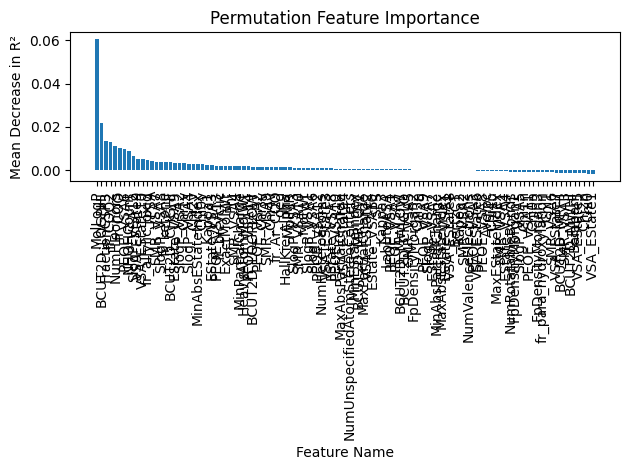

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sort by importance
sorted_idx = result.importances_mean.argsort()[::-1]

# Get the names of the selected features from X_selected
selected_feature_names = X_selected.columns

# Print top features with their names
for idx in sorted_idx:
    print(f"{selected_feature_names[idx]} - {idx} -Importance: {result.importances_mean[idx]:.4f}")


# Calculate and print the sum of all feature importances
total_importance = np.sum(result.importances_mean)
print(f"\nSum of all feature importances: {total_importance:.4f}")


# Optional: plot
# Use the number of selected features for the x-axis range
plt.bar(range(len(sorted_idx)), result.importances_mean[sorted_idx])
# Use the sorted indices themselves as labels for the x-axis ticks
plt.xticks(ticks=range(len(sorted_idx)), labels=selected_feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Mean Decrease in R²")
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()

**Seleção manual das variaveis (features)**

In [ ]:
selected_cols_subset = ['MolLogP', 'BCUT2D_LOGPHI', 'fr_COO2', 'PEOE_VSA6', 'FractionCSP3', 'fr_COO', 'NumHDonors',
                        'MolMR', 'VSA_EState9', 'EState_VSA9', 'SMR_VSA4', 'BCUT2D_CHGHI', 'Chi0v', 'Chi1v',
                        'SlogP_VSA4', 'EState_VSA4', 'NHOHCount', 'fr_ketone', 'MinAbsEStateIndex', 'SlogP_VSA12',
                        'BCUT2D_MRHI', 'fr_allylic_oxid', 'PEOE_VSA1', 'SMR_VSA10', 'SMR_VSA3', 'HeavyAtomMolWt',
                        'TPSA', 'MinAbsPartialCharge', 'PEOE_VSA2', 'qed', 'ExactMolWt', 'SlogP_VSA2', 'Chi3v',
                        'PEOE_VSA12', 'PEOE_VSA13', 'Chi2v', 'MaxEStateIndex', 'LabuteASA', 'HallKierAlpha',
                          'BCUT2D_MRLOW', 'Kappa3', 'EState_VSA3', 'Chi4v', 'PEOE_VSA9']
X_subset = X_selected[selected_cols_subset]

In [ ]:
X_subset

,MolLogP,BCUT2D_LOGPHI,fr_COO2,PEOE_VSA6,FractionCSP3,fr_COO,NumHDonors,MolMR,VSA_EState9,EState_VSA9,...,PEOE_VSA13,Chi2v,MaxEStateIndex,LabuteASA,HallKierAlpha,BCUT2D_MRLOW,Kappa3,EState_VSA3,Chi4v,PEOE_VSA9
0,6.54398,2.603994,0,61.568889,0.304348,0,0,108.1560,0.0,42.382215,...,0.000000,5.905463,13.645096,209.082931,-2.98,-0.149130,5.202421,0.0,2.123976,20.972302
1,4.50630,2.616540,0,31.937401,1.000000,0,0,77.3390,0.0,40.592786,...,0.000000,8.842525,8.122459,136.678321,1.27,0.280469,9.015633,0.0,4.293511,21.342522
3,4.20050,2.235038,0,23.685777,0.066667,0,2,81.0619,0.0,25.390693,...,5.907180,4.103814,12.556250,153.085328,-2.74,-0.274190,5.165272,0.0,1.400426,21.552153
4,4.14460,2.620373,0,48.167729,0.400000,0,0,68.7510,0.0,36.891982,...,0.000000,8.166421,7.956039,116.157556,0.18,0.385307,3.738424,0.0,3.349260,9.595310
5,5.05840,2.405406,0,45.247556,0.500000,0,0,97.3738,0.0,32.898205,...,5.687386,3.805077,12.796588,185.421416,-2.77,-0.394311,5.944744,0.0,1.376972,21.372075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,3.30840,2.254886,0,25.788622,0.461538,0,1,64.8487,0.0,26.085496,...,0.000000,2.308897,12.039495,123.563424,-1.51,0.202639,3.260045,0.0,0.768960,5.483034
2095,4.43500,2.313483,0,30.212094,0.294118,0,1,79.7987,0.0,29.451600,...,0.000000,3.481676,13.399967,152.820747,-2.01,-0.137149,4.494854,0.0,1.177162,19.271037
2096,1.37932,2.244088,1,13.703784,0.428571,1,2,73.8560,0.0,23.404420,...,7.338379,3.672447,13.129906,140.521387,-2.24,-0.122885,2.171882,0.0,1.366863,8.304969
2097,-0.00930,1.854006,0,0.000000,1.000000,0,0,16.7710,0.0,8.224551,...,0.000000,0.491582,6.848958,39.120218,-0.08,0.069193,0.596978,0.0,0.104167,21.342522


In [ ]:
# autoescalonamento da matriz de entrada

import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X_subset2 = pd.DataFrame(scaler.fit_transform(X_subset))   # X

In [ ]:
from sklearn.model_selection import train_test_split

X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset2, saida, test_size=0.25, random_state=13)

## Modelo rede neural Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(48, activation='relu', input_shape=(X_train_subset.shape[1],)), # First hidden layer
    Dropout(0.1), # Add dropout after the first hidden layer (e.g., with a dropout rate of 20%)
    Dense(128, activation='relu'), # Second hidden layer
    Dropout(0.1), #
    Dense(256, activation='relu'), # 3rd hidden layer
    Dropout(0.1), #
    Dense(128, activation='relu'), # 4th hidden layer
    Dropout(0.1), #
    Dense(64, activation='linear'), # 6th hidden layer
    Dense(1) # Output layer for regression
])

# Compile the model with a specified learning rate for Adam optimizer
optimizer = Adam(learning_rate=0.001) # You can adjust the learning rate here

model.compile(optimizer=optimizer,
              loss='mse', # Mean Squared Error for regression
              metrics=['mae', 'mse']) # Mean Absolute Error and Mean Squared Error as metrics

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_subset.shape[1],)), # First hidden layer
    Dropout(0.1), # Add dropout after the first hidden layer (e.g., with a dropout rate of 20%)
    Dense(256, activation='relu'), # Second hidden layer
    Dropout(0.1), #
    Dense(1024, activation='relu'), # 3rd hidden layer
    Dropout(0.1), #
    Dense(128, activation='relu'), # 4th hidden layer
    Dropout(0.1), #
    Dense(32, activation='linear'), # 6th hidden layer
    Dense(1) # Output layer for regression
])

# Compile the model with a specified learning rate for Adam optimizer
optimizer = Adam(learning_rate=0.001) # You can adjust the learning rate here

model.compile(optimizer=optimizer,
              loss='mse', # Mean Squared Error for regression
              metrics=['mae', 'mse']) # Mean Absolute Error and Mean Squared Error as metrics

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train_subset, y_train_subset,
                    epochs=20, # You can adjust the number of epochs
                    batch_size=32, # You can adjust the batch size
                    validation_split=0.2) # Use a validation split to monitor training

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3734 - mae: 0.4626 - mse: 0.3734 - val_loss: 1.0996 - val_mae: 0.7807 - val_mse: 1.0996
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3443 - mae: 0.4440 - mse: 0.3443 - val_loss: 1.0316 - val_mae: 0.7602 - val_mse: 1.0316
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3534 - mae: 0.4403 - mse: 0.3534 - val_loss: 0.9895 - val_mae: 0.7466 - val_mse: 0.9895
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3456 - mae: 0.4489 - mse: 0.3456 - val_loss: 0.9936 - val_mae: 0.7308 - val_mse: 0.9936
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2976 - mae: 0.4072 - mse: 0.2976 - val_loss: 1.0106 - val_mae: 0.7394 - val_mse: 1.0106
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3823 - mae: 0.4556 - mse: 0.3823 - val_loss: 1.0463 - val_mae: 0.7467 - val_mse: 1.0463
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2972 - mae: 0.4271 - mse: 0.2972 - val_loss: 0.9476 

In [ ]:
# Evaluate the model on the test data
loss, mae, mse = model.evaluate(X_test_subset, y_test_subset, verbose=0)

print(f"Test Loss (MSE): {mse:.2f}")
print(f"Test MAE: {mae:.2f}")

# Make predictions on the test data
y_pred_nn = model.predict(X_test_subset).flatten()

# Calculate R2 score for the test set
from sklearn.metrics import r2_score
r2_nn = r2_score(y_test_subset, y_pred_nn)
print('\n')
print(f"Test R²: {r2_nn:.4f}")

# Calculate R2 score for the training set
y_predc_nn = model.predict(X_train_subset).flatten()
r2cal_nn = r2_score(y_train_subset, y_predc_nn)
print('\n')
print(f"Calibration R²: {r2cal_nn:.4f}")

Test Loss (MSE): 1.24
Test MAE: 0.79
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Test R²: 0.4935
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Calibration R²: 0.8551


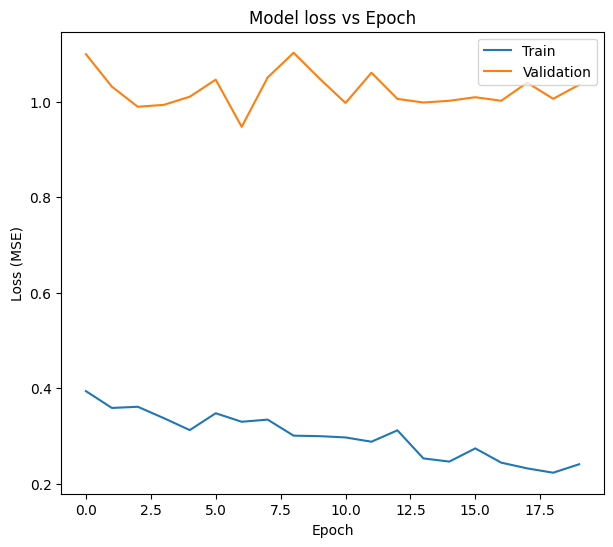

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(7, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss vs Epoch')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

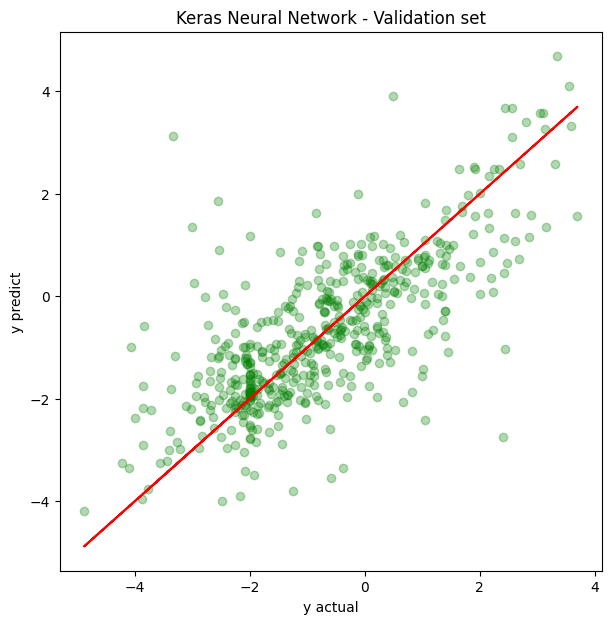

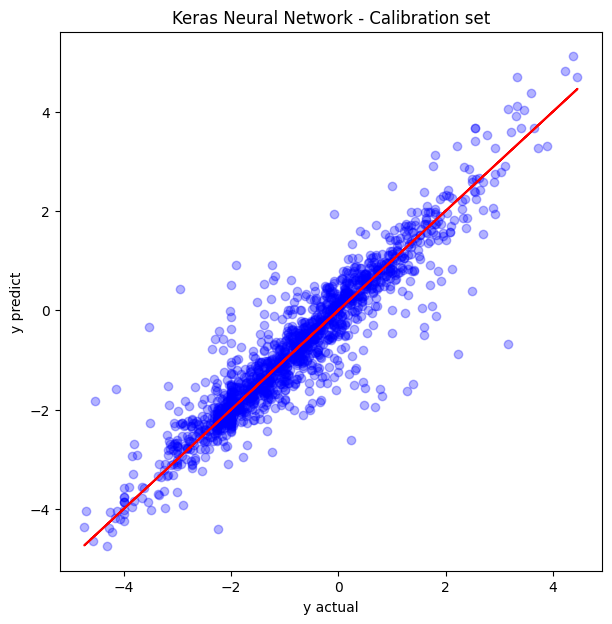

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot predictions vs actual for the test set
plt.figure(figsize=(7, 7))
plt.scatter(x=y_test_subset, y=y_pred_nn, c='green' ,alpha=0.3)
z = np.polyfit(y_test_subset, y_test_subset, 1)
p = np.poly1d(z)
plt.plot(y_test_subset, p(y_test_subset), 'red')
plt.title('Keras Neural Network - Validation set')
plt.ylabel('y predict')
plt.xlabel('y actual')
plt.show()

# Plot predictions vs actual for the training set
plt.figure(figsize=(7, 7))
plt.scatter(x=y_train_subset, y=y_predc_nn, c='blue' ,alpha=0.3)
z = np.polyfit(y_train_subset, y_train_subset, 1)
p = np.poly1d(z)
plt.plot(y_train_subset, p(y_train_subset), 'red')
plt.title('Keras Neural Network - Calibration set')
plt.ylabel('y predict')
plt.xlabel('y actual')
plt.show()